# 探索性数据分析

## 加载数据

In [1]:
import pandas as pd

data_train = pd.read_csv('./input/train.csv')
data_test = pd.read_csv('./input/test.csv')

In [2]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 探索性数据分析

### 性别特征

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


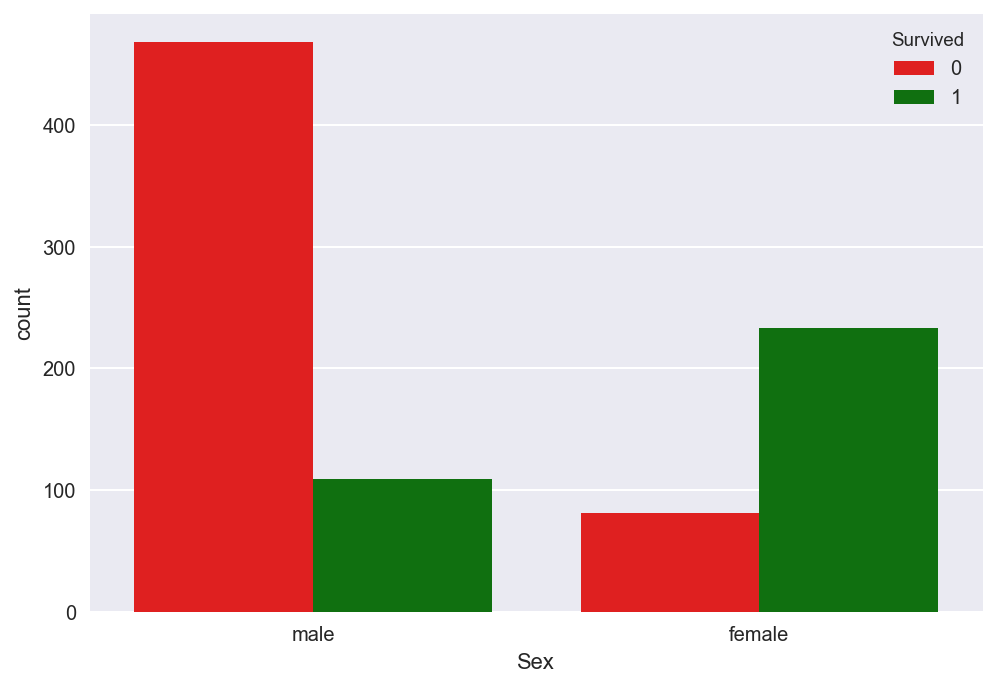

In [3]:
import seaborn as sns

sns.countplot(
    x='Sex', data=data_train, hue='Survived', palette={
        0: 'r',
        1: 'g'
    })
plt.show()

In [4]:
Sex_Survived_pivot_table = pd.pivot_table(
    data_train,
    index='Sex',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')
Sex_Survived_pivot_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [5]:
from scipy.stats import chi2_contingency

chi2_contingency(Sex_Survived_pivot_table.values)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

可以看到 $p$ 值为 $1.1973570627755645e-58$，远小于 $0.05$，因此“性别”和“幸存”的确不是独立的，“性别”是一项预测“是否幸存”的重要特征。

### Age

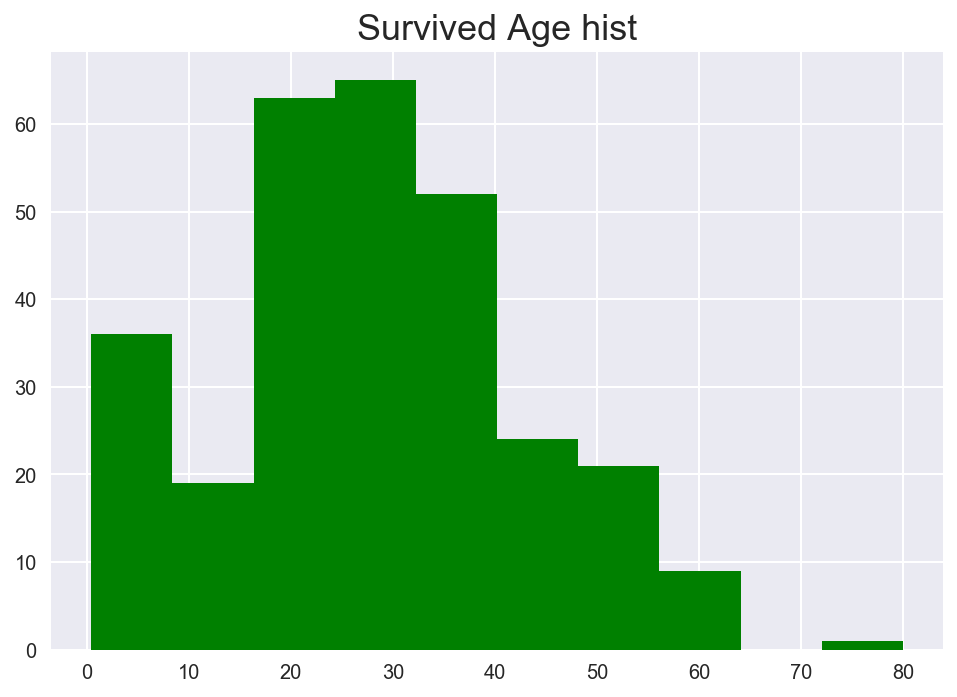

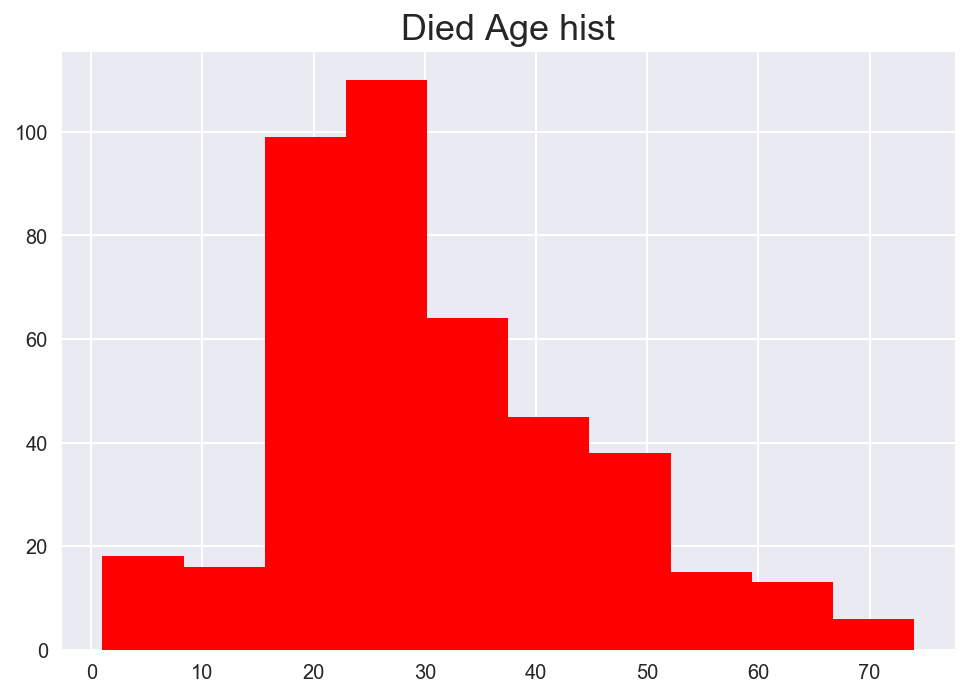

In [6]:
data_train[data_train['Survived'] == 1]['Age'].hist(color='g')
plt.title('Survived Age hist', size=18)
plt.show()

data_train[data_train['Survived'] == 0]['Age'].hist(color='r')
plt.title('Died Age hist', size=18)
plt.show()

### 票价

连续型变量。

可以使用箱线图或者小提琴图看分布。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


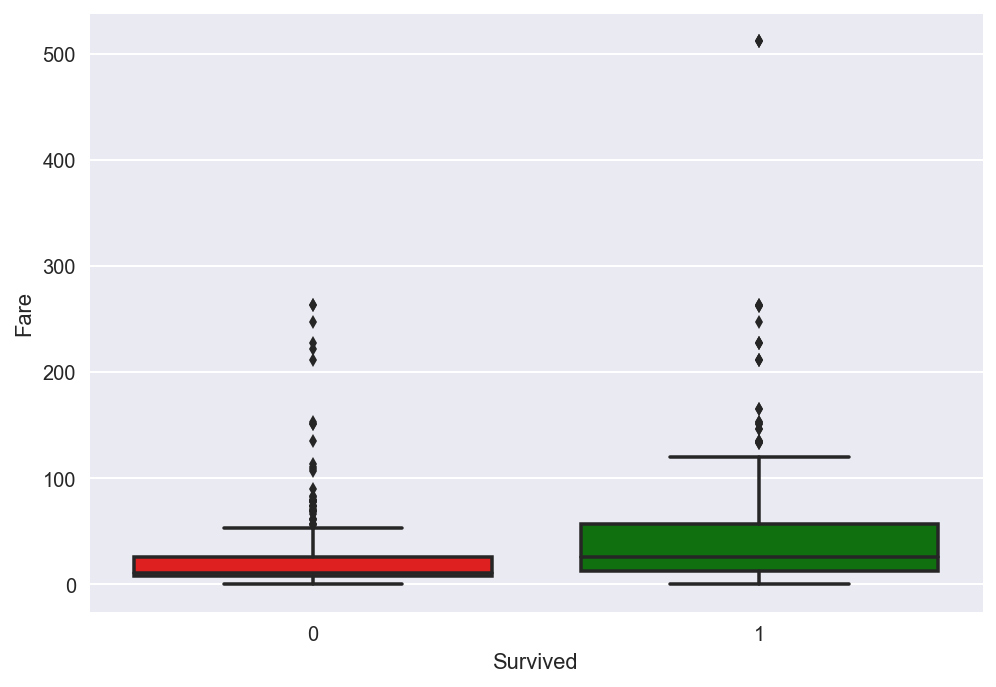

In [7]:
sns.boxplot(x="Survived", y="Fare", data=data_train, palette={0: 'r', 1: 'g'})
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


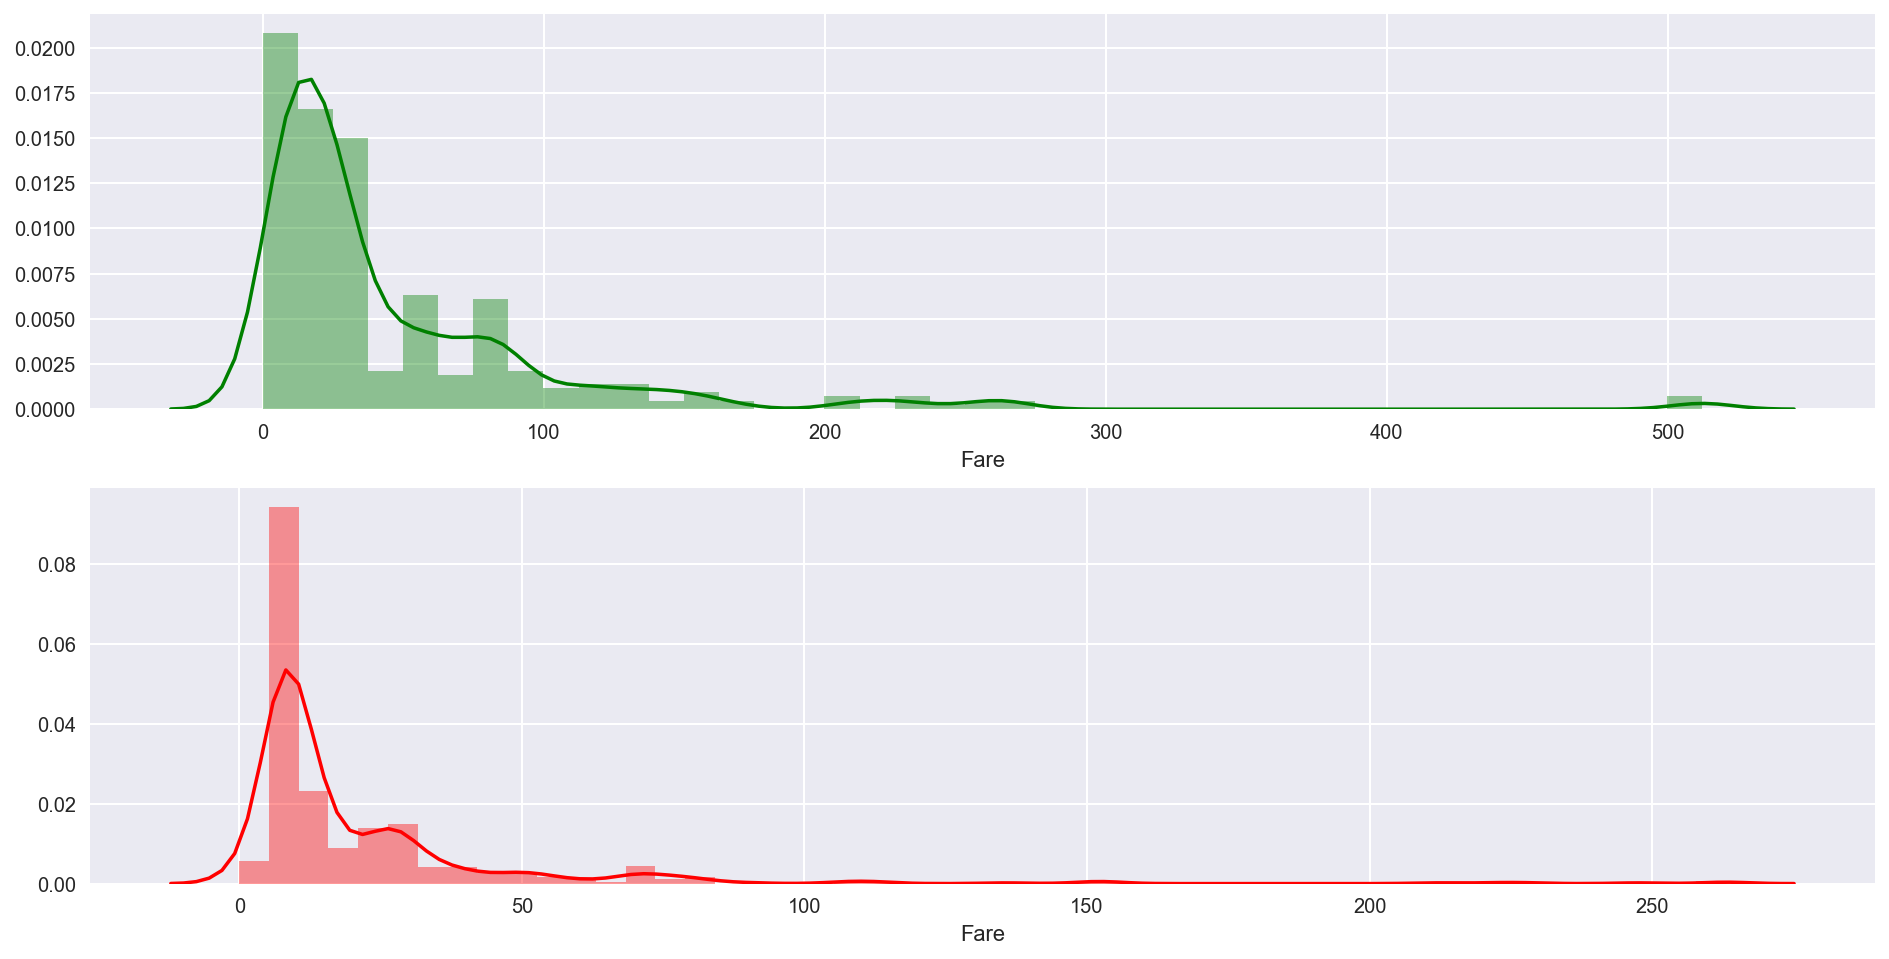

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
sns.distplot(
    data_train[data_train['Survived'] == 1]['Fare'], color='g', ax=axes[0])
sns.distplot(
    data_train[data_train['Survived'] == 0]['Fare'], color='r', ax=axes[1])
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


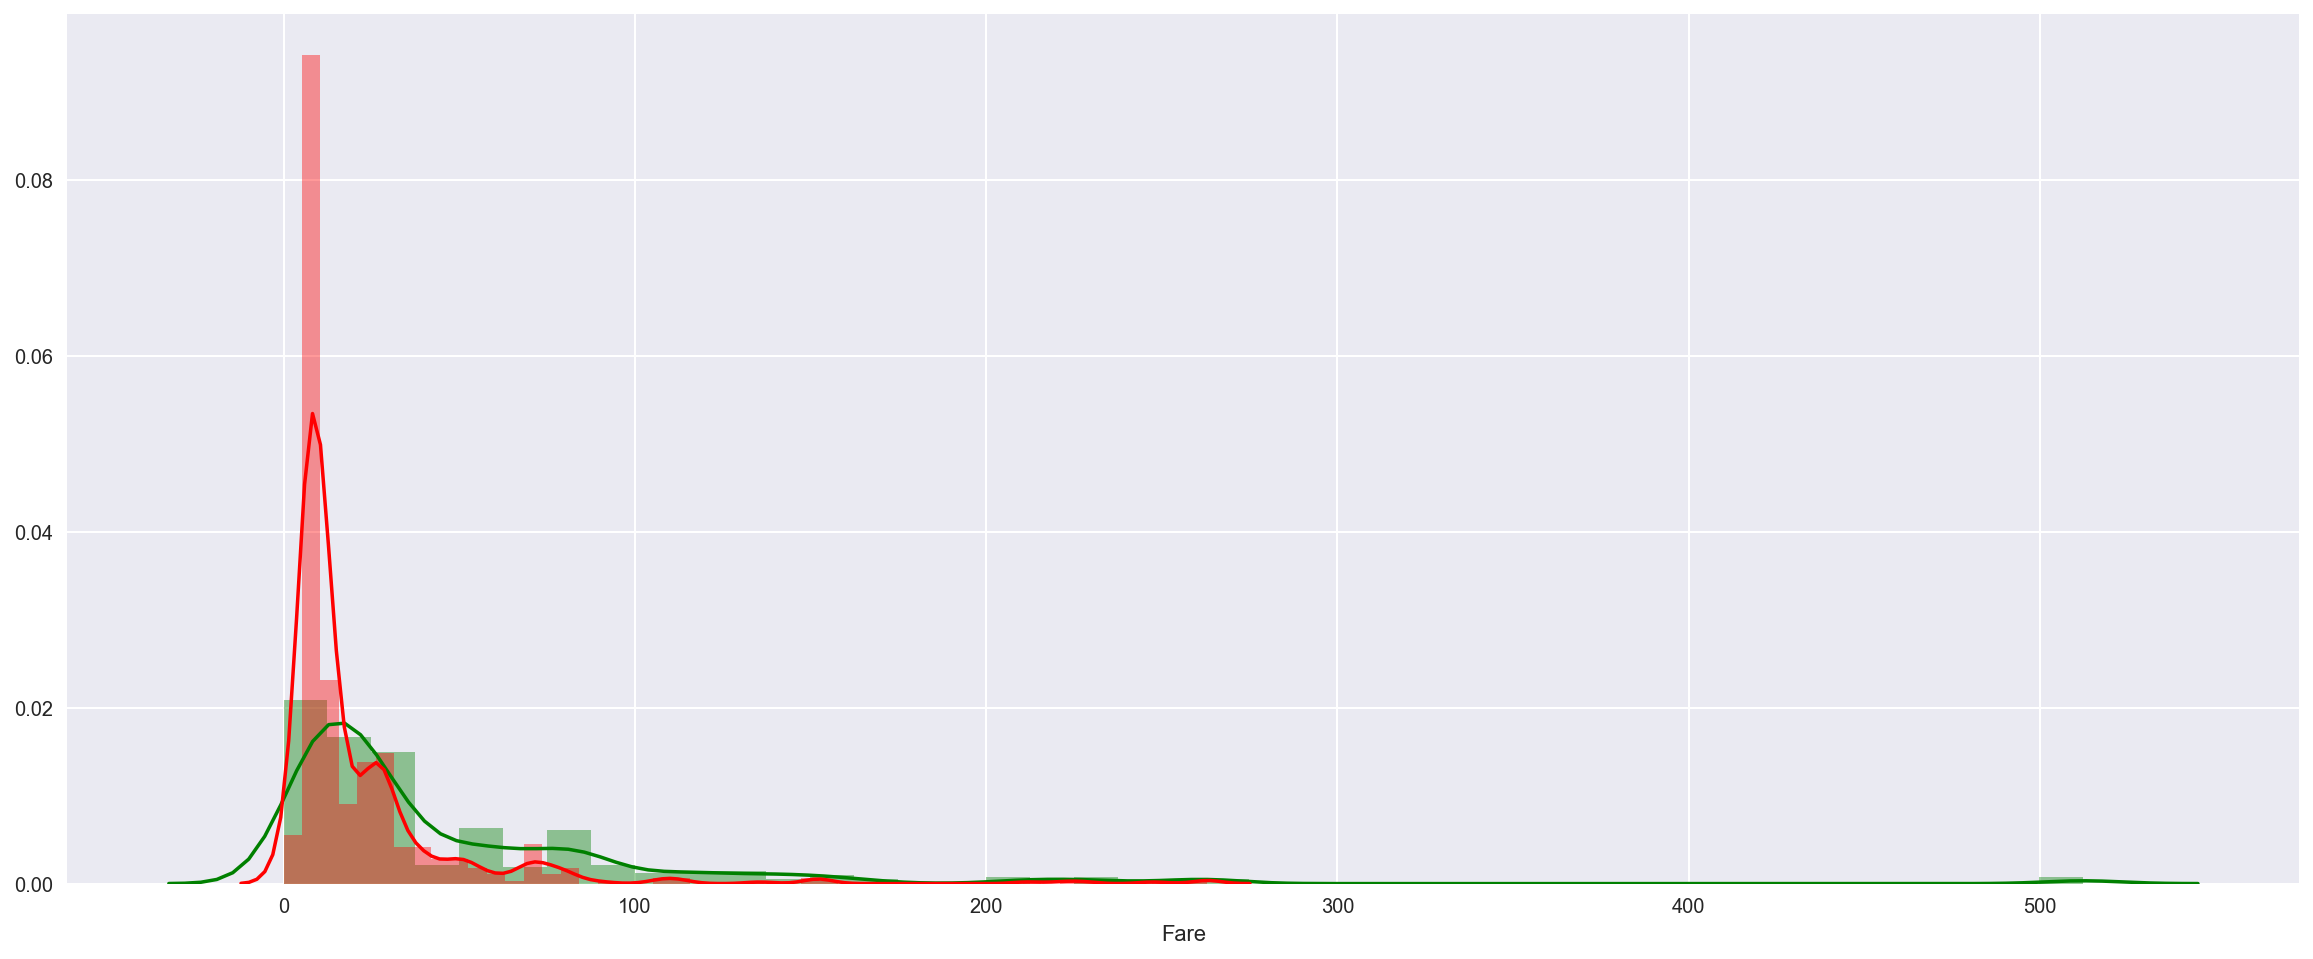

In [9]:
plt.figure(figsize=(20, 8))
sns.distplot(data_train[data_train['Survived'] == 1]['Fare'], color='g')
sns.distplot(data_train[data_train['Survived'] == 0]['Fare'], color='r')
plt.show()

可以看出，票价比较低的，死亡的人数比较多，因此票价是一个重要的特征。

### Pclass

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


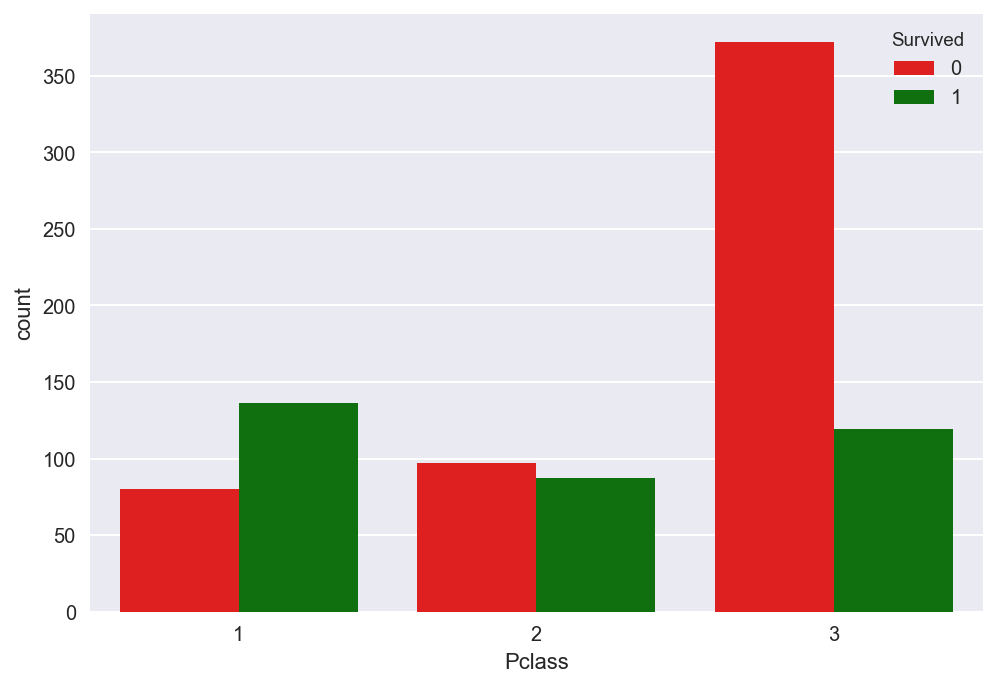

In [10]:
sns.countplot(
    x='Pclass', hue='Survived', palette={0: 'r',
                                         1: 'g'}, data=data_train)
plt.show()

可以看到，$1$ 号乘客等级幸存者较多， $3$ 号乘客等级死亡比幸存多很多，因此乘客等级是一个预测是否幸存的重要变量。

In [11]:
Pclass_Survived_pivot_table = pd.pivot_table(
    data_train,
    index='Pclass',
    columns='Survived',
    values=['PassengerId'],
    aggfunc='count')

In [12]:
from scipy.stats import chi2_contingency

chi2_contingency(Pclass_Survived_pivot_table.values)

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

### Fare

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


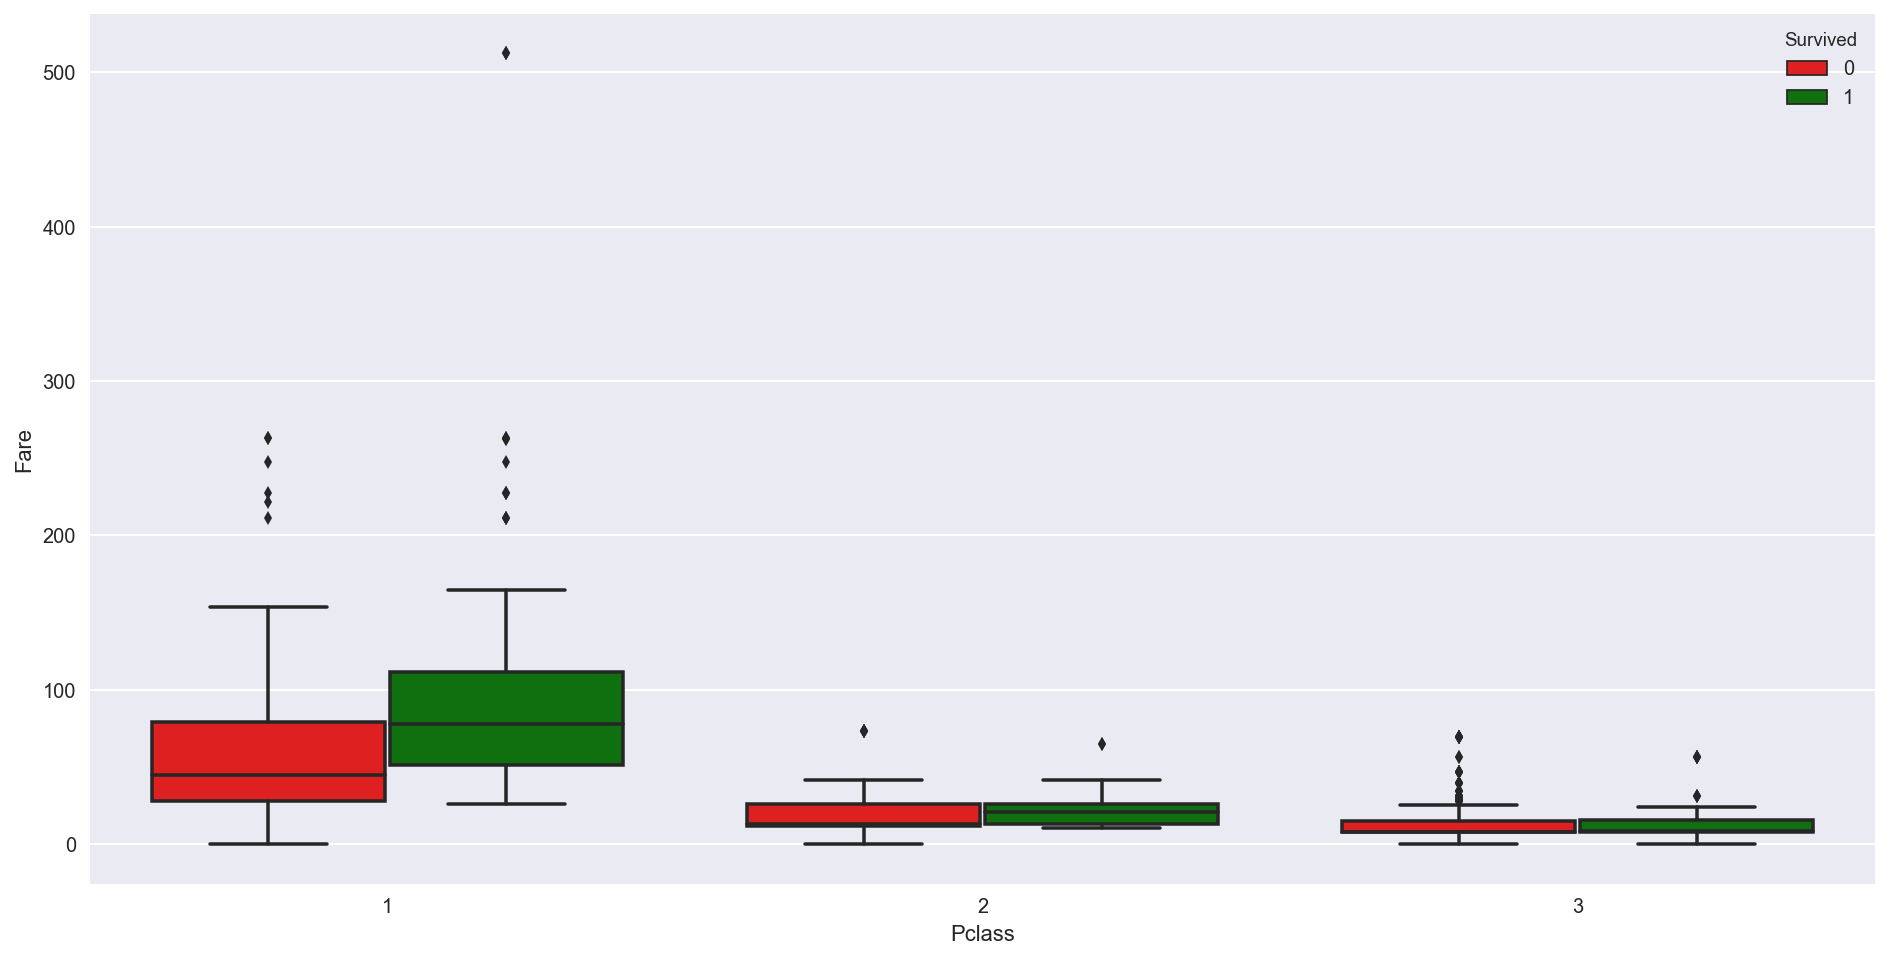

In [13]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Pclass',
    y='Fare',
    data=data_train,
    hue='Survived',
    palette={
        0: 'r',
        1: 'g'
    })
plt.show()

乘客等级为 1 的，票价相对较高。

### Embarked

In [14]:
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


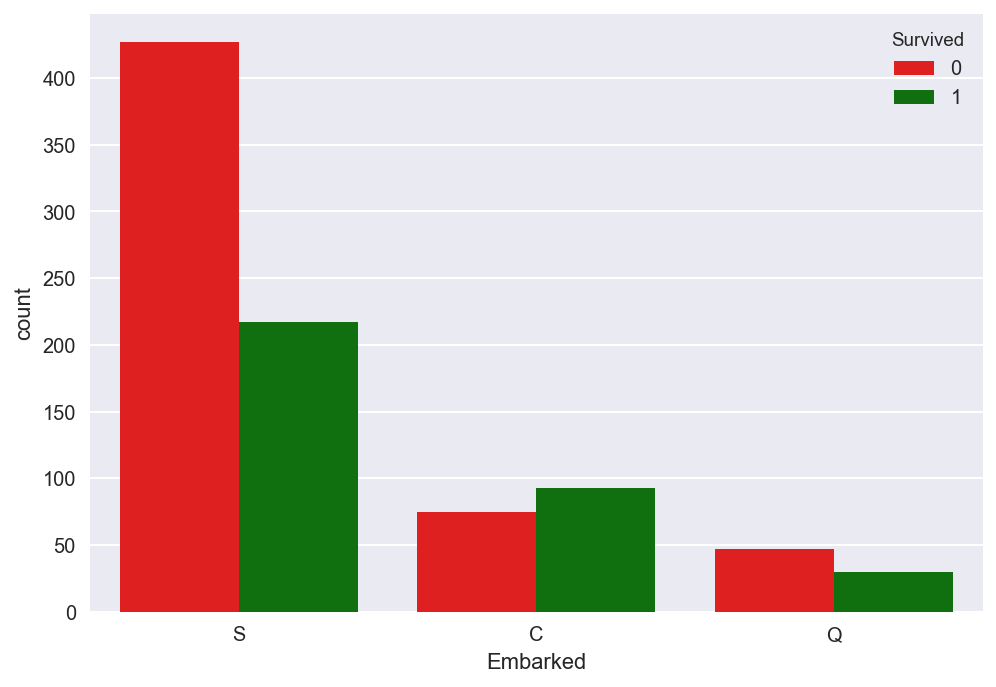

In [15]:
sns.countplot(
    x='Embarked', hue='Survived', palette={0: 'r',
                                           1: 'g'}, data=data_train)
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


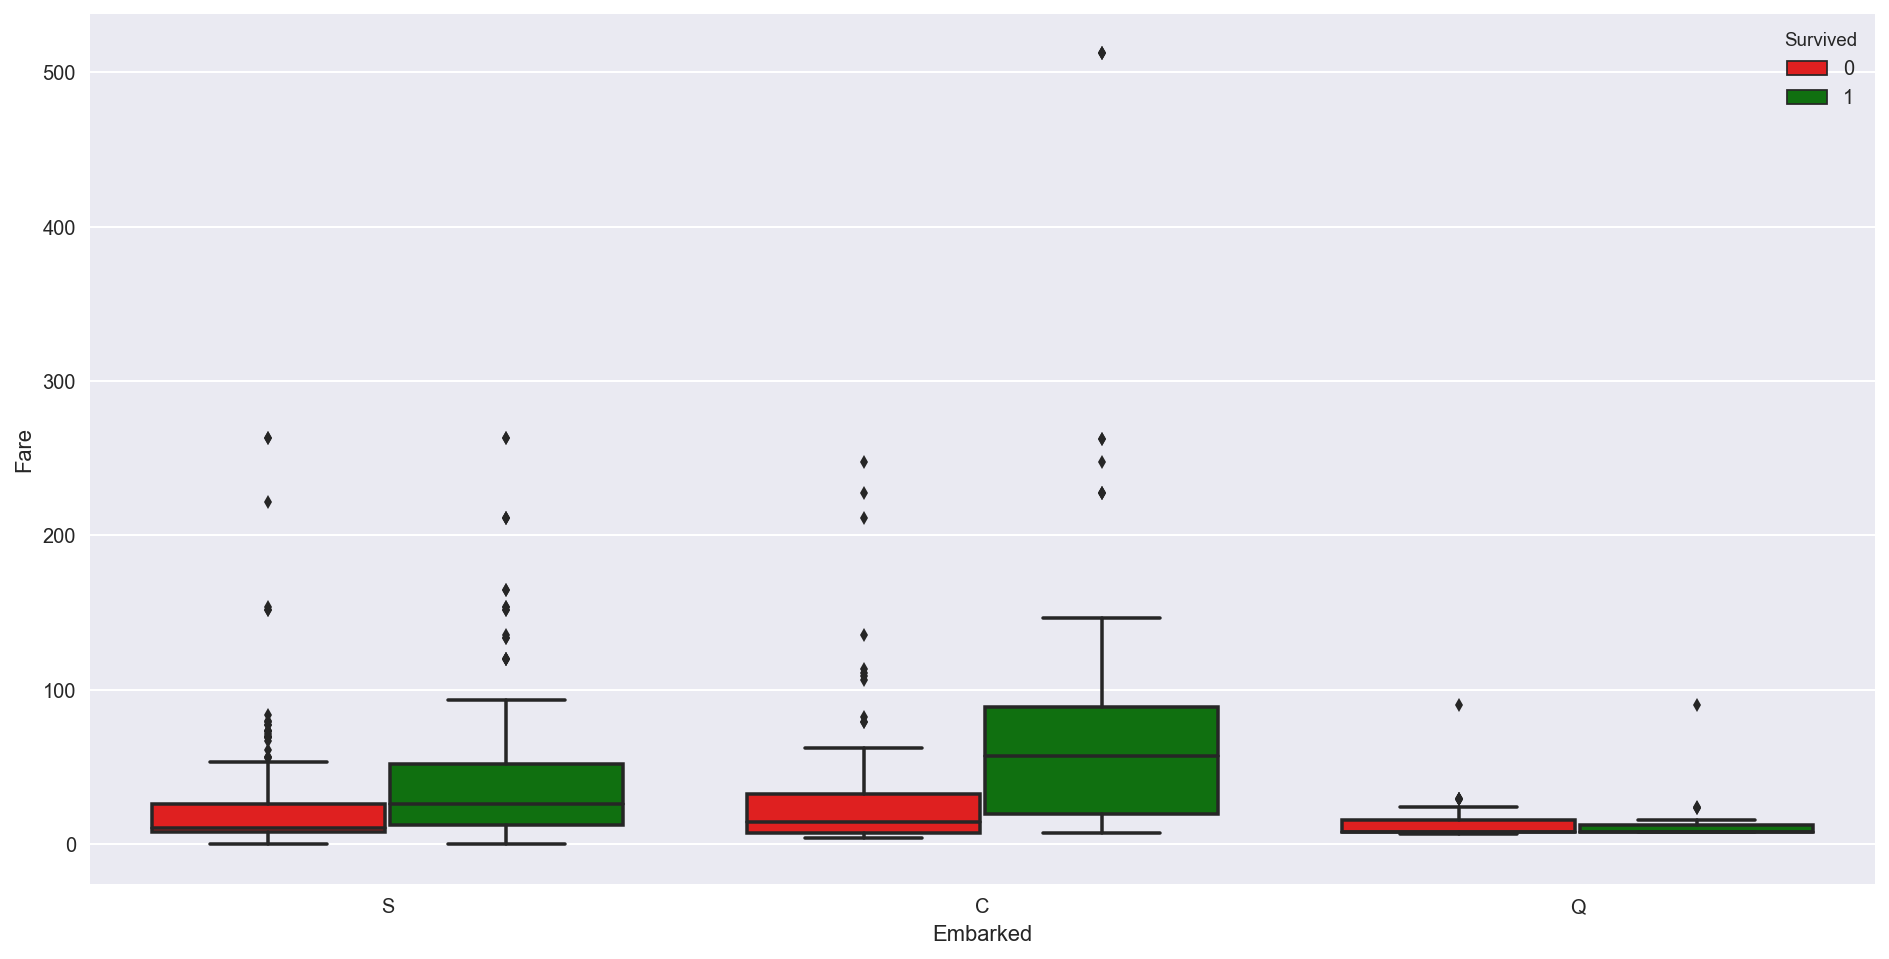

In [16]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Embarked',
    y='Fare',
    data=data_train,
    hue='Survived',
    palette={
        0: 'r',
        1: 'g'
    })
plt.show()

In [17]:
Embarked_Survived_pivot_table = pd.pivot_table(
    data=data_train,
    index='Embarked',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')
Embarked_Survived_pivot_table

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [18]:
from scipy.stats import chi2_contingency

chi2_contingency(Embarked_Survived_pivot_table.values)

(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  64.2519685],
        [ 47.5511811,  29.4488189],
        [397.7007874, 246.2992126]]))

## 特征工程

In [19]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
y = data_train.Survived
PassengerId = data_test.PassengerId

In [22]:
data_train.drop(['Survived'], axis=1, inplace=True)

### 合在一起

In [23]:
combined = pd.concat([data_train, data_test], sort=False)

In [24]:
combined.shape

(1309, 11)

In [25]:
combined.drop(['PassengerId'], inplace=True, axis=1)

In [26]:
combined.shape

(1309, 10)

### 抽取 Title 特征

In [27]:
combined['title'] = combined['Name'].map(
    lambda x: x.split(',')[1].split('.')[0].strip())

In [28]:
combined['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Dona              1
Sir               1
Lady              1
the Countess      1
Capt              1
Mme               1
Don               1
Name: title, dtype: int64

In [29]:
# 再根据这些 title 细分，是官员，还是皇室，还是女士、先生、小姐
combined['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [30]:
Title_Dictionary = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Don": "Royalty",
    "Rev": "Officer",
    "Dr": "Officer",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Major": "Officer",
    "Lady": "Royalty",
    "Sir": "Royalty",
    "Mlle": "Miss",
    "Col": "Officer",
    "Capt": "Officer",
    "the Countess": "Royalty",
    "Jonkheer": "Royalty",
    "Dona": 'Mrs'
}

In [31]:
combined['Title'] = combined['title'].map(Title_Dictionary)
combined['Title'].value_counts()

Mr         757
Miss       262
Mrs        201
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

In [32]:
del combined['Name']
del combined['title']

In [33]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 抽取家庭规模

In [34]:
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [35]:
def deal_with_family_size(num):
    if num == 1:
        return 'Singleton'
    elif num <= 4:
        return 'SmallFamily'
    elif num >= 5:
        return 'LargeFamily'
    return num

combined['FamilySize'] = combined['FamilySize'].map(deal_with_family_size)

## 缺失值填充

### Age

In [36]:
combined.isnull().sum()

Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
Title            0
FamilySize       0
dtype: int64

根据 Sex、Pclass 和 Title 分组，如果落在相同的组别里，就用这个组别的中位数填充。

In [37]:
age_group_mean = combined.groupby(['Sex', 'Pclass', 'Title'])['Age'].mean().reset_index()
age_group_mean

,Sex,Pclass,Title,Age
0,female,1,Miss,30.131148
1,female,1,Mrs,42.869565
2,female,1,Officer,49.000000
3,female,1,Royalty,40.500000
4,female,2,Miss,20.717083
5,female,2,Mrs,33.418182
6,female,3,Miss,17.360874
7,female,3,Mrs,32.326531
8,male,1,Master,6.984000
9,male,1,Mr,41.450758


In [38]:
def select_group_age_median(row):
    condition = ((row['Sex'] == age_group_mean['Sex']) &
                 (row['Pclass'] == age_group_mean['Pclass']) &
                 (row['Title'] == age_group_mean['Title']))
    return age_group_mean[condition]['Age'].values[0]

In [39]:
# 针对每一行做映射，所以要加上 `axis=1`
combined['Age'] = combined.apply(
    lambda x: select_group_age_median(x) if np.isnan(x['Age']) else x['Age'],
    axis=1)

In [40]:
def age_bin(x):
    if x <= 18:
        return 'child'
    elif x <= 30:
        return 'young'
    elif x <= 55:
        return 'midlife'
    else:
        return 'old'


combined['age_bin'] = combined['Age'].map(age_bin)

### Fare

既然是测试数据缺失了，就用训练数据填充它。

In [41]:
combined.isnull().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
Title            0
FamilySize       0
age_bin          0
dtype: int64

In [42]:
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

### Embarked 

Embarked 有两个缺失值，使用众数填充就好了。

In [43]:
combined['Embarked'].fillna(combined['Embarked'].mode(), inplace=True)

### Cabin

In [44]:
combined['Cabin'][combined['Cabin'].notnull()] = 'yes'
combined['Cabin'][combined['Cabin'].isnull()] = 'no'

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
combined['Cabin'].value_counts()

no     1014
yes     295
Name: Cabin, dtype: int64

## 离散型变量做独热编码

做完独热编码以后，要把原始变量删掉。

In [46]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,age_bin
0,3,male,22.0,1,0,A/5 21171,7.2500,no,S,Mr,SmallFamily,young
1,1,female,38.0,1,0,PC 17599,71.2833,yes,C,Mrs,SmallFamily,midlife
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,no,S,Miss,Singleton,young
3,1,female,35.0,1,0,113803,53.1000,yes,S,Mrs,SmallFamily,midlife
4,3,male,35.0,0,0,373450,8.0500,no,S,Mr,Singleton,midlife


In [47]:
combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
combined['Cabin'] = combined['Cabin'].map({'yes': 1, 'no': 0})

In [48]:
Embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
Title_dummies =  pd.get_dummies(combined['Title'], prefix='Title')
FamilySize_dummies = pd.get_dummies(combined['FamilySize'], prefix='FamilySize')
age_bin_dummies =  pd.get_dummies(combined['age_bin'], prefix='age_bin')

In [51]:
combined.drop(
    ['Ticket', 'Embarked', 'Title', 'FamilySize', 'age_bin'],
    axis=1,
    inplace=True)

In [53]:
combined = pd.concat(
    [
        combined, Embarked_dummies, Title_dummies, FamilySize_dummies,
        age_bin_dummies
    ],
    axis=1)

In [54]:
X = combined.iloc[:891]
X_pred = combined.iloc[891:]

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, max_features='sqrt')

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=10)
scores

array([0.76666667, 0.84444444, 0.75280899, 0.82022472, 0.85393258,
       0.80898876, 0.78651685, 0.76404494, 0.82022472, 0.82954545])

In [57]:
scores.mean()

0.8047398138690275

In [59]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc.feature_importances_

array([0.06491904, 0.09126741, 0.17321912, 0.03094963, 0.02712569,
       0.21530323, 0.04380128, 0.0127991 , 0.00756291, 0.01378034,
       0.00869923, 0.06088878, 0.09349542, 0.05773123, 0.0068233 ,
       0.0012815 , 0.01749125, 0.01267878, 0.01934083, 0.01210423,
       0.01183778, 0.0053295 , 0.01157042])

In [61]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'FamilySize_LargeFamily',
       'FamilySize_Singleton', 'FamilySize_SmallFamily', 'age_bin_child',
       'age_bin_midlife', 'age_bin_old', 'age_bin_young'],
      dtype='object')

In [63]:
feature_importances = pd.Series(rfc.feature_importances_, X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

Fare                      0.215303
Age                       0.173219
Title_Mr                  0.093495
Sex                       0.091267
Pclass                    0.064919
Title_Miss                0.060889
Title_Mrs                 0.057731
Cabin                     0.043801
SibSp                     0.030950
Parch                     0.027126
FamilySize_SmallFamily    0.019341
FamilySize_LargeFamily    0.017491
Embarked_S                0.013780
Embarked_C                0.012799
FamilySize_Singleton      0.012679
age_bin_child             0.012104
age_bin_midlife           0.011838
age_bin_young             0.011570
Title_Master              0.008699
Embarked_Q                0.007563
Title_Officer             0.006823
age_bin_old               0.005329
Title_Royalty             0.001282
dtype: float64

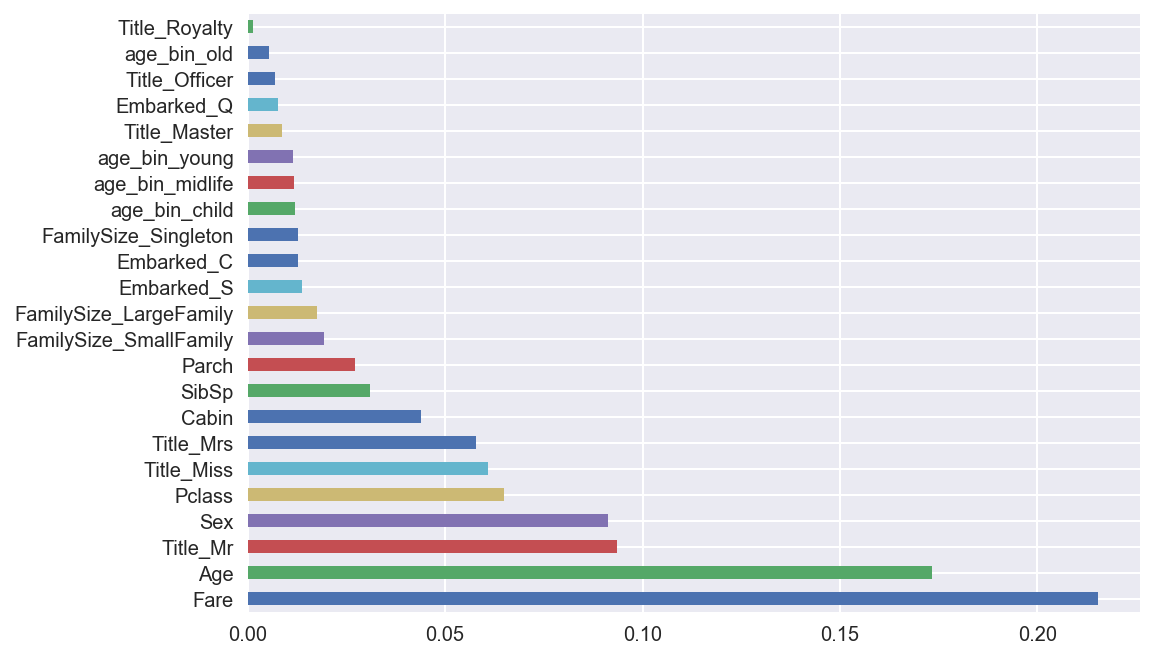

In [65]:
feature_importances.plot(kind='barh')
plt.show()

In [67]:
# 传入这个类的模型，必须要有 `feature_importances_` 这个属性。
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rfc, prefit=True)
train_reduced = sfm.transform(X)

In [68]:
train_reduced.shape

(891, 8)

In [69]:
train_reduced

array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  0.        , 26.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 17.36087379, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  0.        ,
         1.        ,  0.        ]])

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

logreg = LogisticRegression()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
xgbc = XGBClassifier()

In [73]:
# 把这些模型放进一个列表中
models = [logreg, rf, gboost, xgbc]

In [74]:
from sklearn.model_selection import cross_val_score

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = cross_val_score(estimator=model, X=train_reduced, y=y, scoring='accuracy')
    print('CV score = {0}'.format(score.mean()))
    print('******')


Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.7979797979797979
******
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8035914702581369
******
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarnin

CV score = 0.8125701459034792
******
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 0.818181818181818
******


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [76]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
        'max_depth': [4, 6, 8],
        'n_estimators': [50, 10],
        'max_features': ['sqrt', 'auto', 'log2'],
        'min_samples_split': [2, 3, 10],
        'min_samples_leaf': [1, 3, 10],
        'bootstrap': [True, False],
    }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(
        forest,
        scoring='accuracy',
        param_grid=parameter_grid,
        cv=cross_validation,
        verbose=1)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters = {
        'bootstrap': False,
        'min_samples_leaf': 3,
        'n_estimators': 50,
        'min_samples_split': 10,
        'max_features': 'sqrt',
        'max_depth': 6
    }

model = RandomForestClassifier(**parameters)
model.fit(X, y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
y_pred = model.predict(X_pred)

In [82]:
res = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
res.to_csv('./gridsearch_rf.csv', index=False)

array([[ 3.        ,  1.        , 34.5       , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  0.        , 47.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        ,  1.        , 62.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 38.5       , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  1.        , 28.31891026, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  1.        ,  6.09      , ...,  0.        ,
         0.        ,  0.        ]])

In [94]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [95]:
y_pred = xgbc.predict(X_pred)

In [97]:
model = RandomForestClassifier(**parameters)
model.fit(X, y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
y_pred = model.predict(X_pred)

In [99]:
res = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
res.to_csv('./rfr.csv', index=False)





泰坦尼克号幸存者预测问题是一个二分类问题，目标变量是离散型变量，1 表示幸存，即 Survived ，0 表示遇难。

| 字段名      | 中文解释                             | 类型   | 说明                 |
| ----------- | ------------------------------------ | ------ | -------------------- |
| PassengerId | 乘客 ID                              | 离散型 |                      |
| Pclass      | 乘客等级                             | 离散型 | 1、2、3 等舱位、有序 |
| Name        | 乘客姓名                             | 离散型 |                      |
| Sex         | 性别                                 | 离散型 | female 和 male       |
| Age         | 年龄                                 | 连续型 | 整型                 |
| SibSp       | 与乘客一起旅行的兄弟姐妹和配偶的数量 | 连续型 | 整型                 |
| Parch       | 与乘客一起旅行的父母和孩子的数量     | 连续型 | 整型                 |
| Ticket      | 船票号码                             | 离散型 | 是一串文字           |
| Fare        | 票价                                 | 连续型 | 浮点数               |
| Cabin       | 客舱                                 | 离散型 | 缺失值较多           |
| Embarked    | 登船港口                             | 离散型 |                      |



数据刚拿到的时候，我们常常使用 `train.shape` 、 `train.head()` 和 `train.describe()` 看一看数据长啥样，有多少个数据，多少个特征。

然后看一看缺失值。`data_train.isnull().sum()`。

## 探索性数据分析（EDA）

**分析特征和目标变量之间的关系**。


EDA ，即 Exploratory Data Analysis ，这一步比较靠经验了。不过也有一定套路。对于泰坦尼克号问题比较简单，就是单独把字段和目标变量拿出来，分析它们之间的关系，即看看那一些特征对于最终我们要预测的变量有关。

> EDA 的目的，我个人觉得就是在验证我们对问题的猜想，就想我们觉得一个人是否能够考上好大学，跟这个人的家庭教育程度有关，那么我们就会去调查这个人父母的受教育程度，通过各种手段来验证我们的猜想，这方面严格的、科学的方式是使用“数理统计”学中“假设检验”的方法，但是初学数据分析的时候，我们往往可以先通过绘图，直观地进行判断（就想其实是一些板上定钉的事情，我们可以先不加严格证明先使用它，绘图具有说服力就好）。

我们常常使用绘图的方式，来验证我们的猜测，因为这样更直观。但实际上，使用“数理统计”中的“假设检验”的知识更加合理（这方面的理论基础我还很薄弱，还要加强学习）。

+ 这一步往往要根据目标变量的定义和问题场景，进行“猜测”，然后绘图验证我们的猜想。



### 猜测：性别是一个和幸存有关的很重要的变量

首先，要注意到 `Sex` 是离散型分类变量，只有两个取值：`male` 和 `female`。


外国人常以“女士优先”，有“绅士风度”，即使是在生死攸关的问题上也是这样。因此我们有理由猜测“男士”会让“女人”和“孩子”先上救生艇，实际上电影也是这么演的。盗个图感慨一下。





```python
data_train.groupby('Sex', as_index=False)['PassengerId'].agg('count')
```



```python
data_train[['Sex', 'PassengerId']].groupby('Sex', as_index=False).agg('count')
```



列联表：

```python
Sex_Survived_pivot_table = pd.pivot_table(
    data_train,
    index='Sex',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')

Sex_Survived_pivot_table.index = ['女士', '男士']
Sex_Survived_pivot_table.columns = ['死亡', '幸存']
Sex_Survived_pivot_table.reindex(columns=['幸存', '死亡'])
```



```python
data_train['Age'][np.logical_and(data_train['Age'].notnull().values,
                                 (data_train['Survived'] == 1).values)]
data_train['Age'][data_train['Age'].notnull().values &
                                 (data_train['Survived'] == 1).values]
```



```python
combined.reset_index(inplace=True)
```



### 猜测：年龄和是否幸存有关

这一点几乎是显然的，青壮年身体好，行动方便，逃生中占优势。注意到年龄是一个连续型的变量，所以我们可以分别看看“幸存”的人和“遇难”的人的年龄分布。

作弊得分。

![image-20190326135840289](https://ws2.sinaimg.cn/large/006tKfTcly1g1g5oq1mjoj31cg094tb6.jpg)

0.80382 成绩还不错了。



参考资料：

1、外国人写的文章

https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html


